# Prodigy Infotech

Author: Aarti Wani

Data Science Intern

Task-03

Task: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [ ]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Loading data
data=pd.read_csv('bank.csv')
columns=data.columns
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Checking dimensions
data.shape

(11162, 17)

In [ ]:
# Checking the datatypes of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Checking five variable summary of numerical features
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# class distribution
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
# Missing values identification
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Checking no. of unique values in each feature
data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
# duplicate values
data.duplicated().sum()

0

<ipython-input-547-a31b2d8f2ba4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['age'])


<Axes: ylabel='Density'>

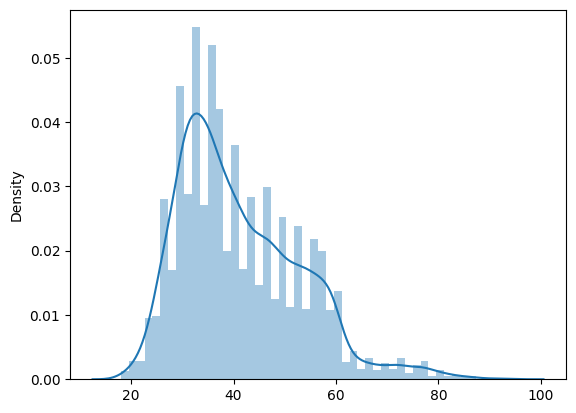

In [ ]:
# Checking distribution of age feature
sns.distplot(x=data['age'])

<ipython-input-548-bfedee5ba1e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['balance'])


<Axes: ylabel='Density'>

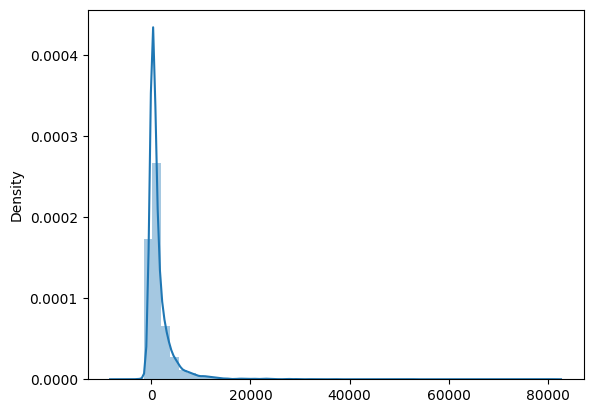

In [ ]:
# Checking distribution of balance feature
sns.distplot(x=data['balance'])

<ipython-input-549-bdfb62e70753>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['duration'])


<Axes: ylabel='Density'>

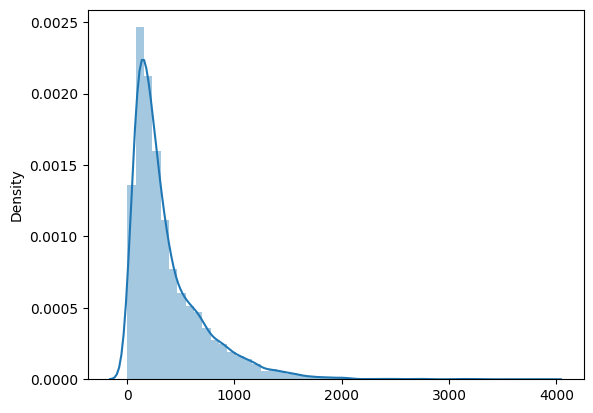

In [ ]:
# Checking distribution of duration feature
sns.distplot(x=data['duration'])

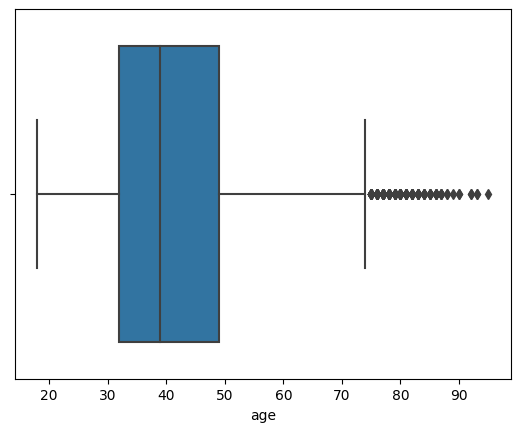

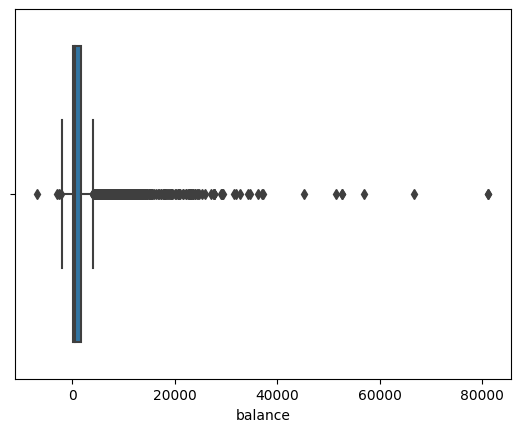

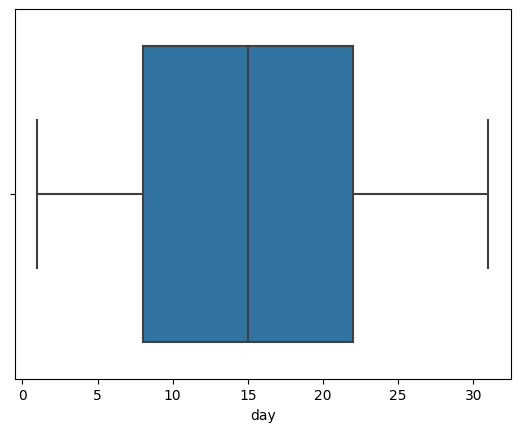

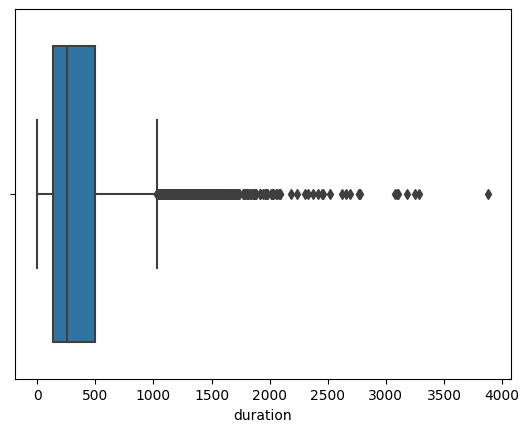

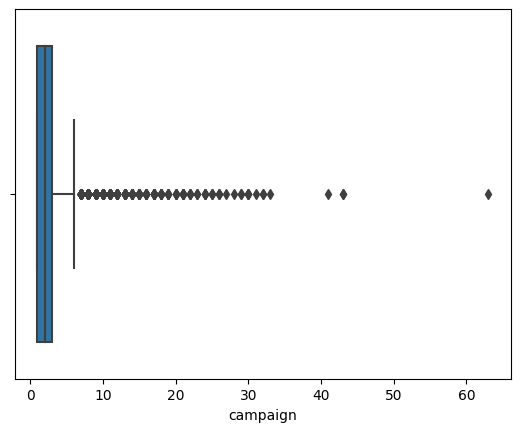

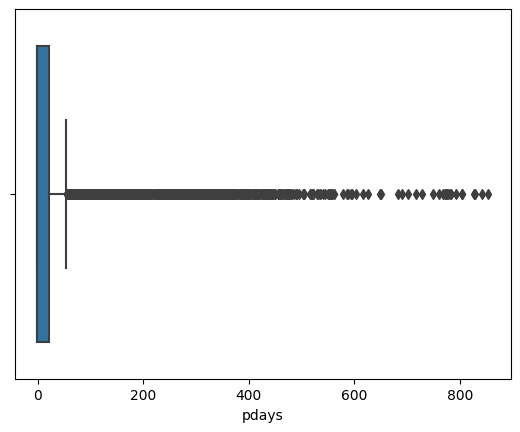

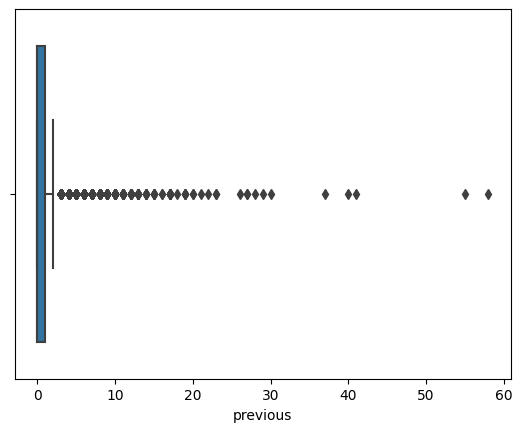

In [ ]:
# outlier detection & removal
continuous_data=data.select_dtypes(include='int64')
for col in continuous_data:
  sns.boxplot(x=col,data=data)
  plt.show()

In [ ]:
for column in continuous_data:
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  IQR=q3-q1
  l_limit=q1-(IQR*1.5)
  u_limit=q3+(IQR*1.5)
  data.loc[data[column]<l_limit,column]=l_limit
  data.loc[data[column]>u_limit,column]=u_limit

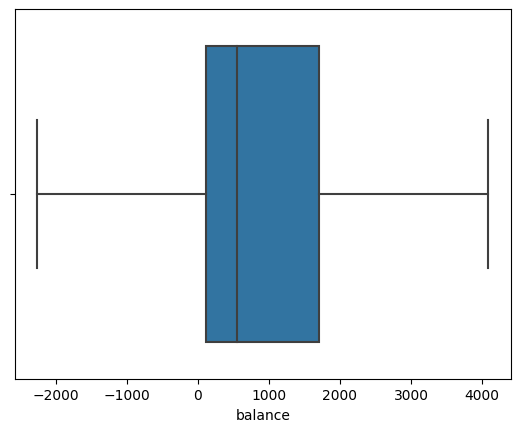

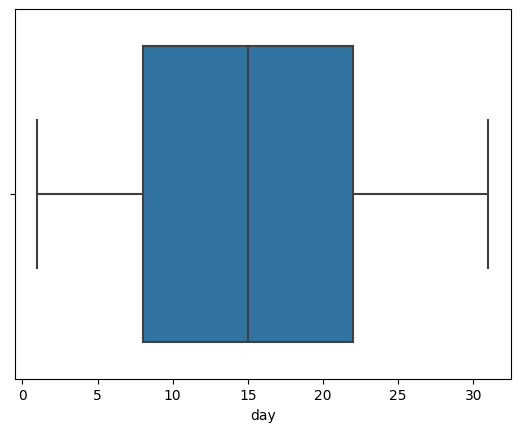

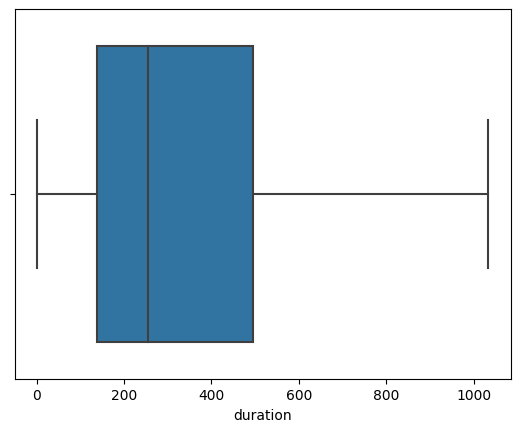

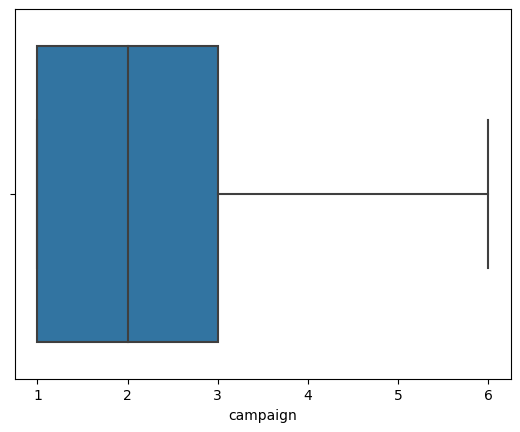

In [ ]:
continuous_data=data.select_dtypes(include='int64')
for col in continuous_data:
  sns.boxplot(x=col,data=data)
  plt.show()

In [ ]:
# Encoding the categorical value
categorical_data=data.select_dtypes(include='object')
for col in categorical_data:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,0,1,1,0,2343,1,0,2,5,8,1033,1,-1.0,0.0,3,1
1,56.0,0,1,1,0,45,0,0,2,5,8,1033,1,-1.0,0.0,3,1
2,41.0,9,1,1,0,1270,1,0,2,5,8,1033,1,-1.0,0.0,3,1
3,55.0,7,1,1,0,2476,1,0,2,5,8,579,1,-1.0,0.0,3,1
4,54.0,0,1,2,0,184,0,0,2,5,8,673,2,-1.0,0.0,3,1


In [ ]:
# separating the data into input and output features
X=data.drop('deposit',axis=1)
y=data['deposit']

In [ ]:
# scaling the input features
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)

In [ ]:
# feature selection
from sklearn.feature_selection import SelectKBest,chi2
selector=SelectKBest(chi2,k=10)
selector.fit(X,y)
X=selector.transform(X)
selector.get_support()


array([False, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True])

In [ ]:
feature_names=['default','balance','housing','loan','contact','duration','campaign','pdays','previous','poutcome']
labels=np.array(y.unique()).astype('str').tolist()

In [ ]:
# Split dataset for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# Building the dec decision tree model
dt=tree.DecisionTreeClassifier(max_depth=3)
clf=dt.fit(X_train,y_train)
# Making predictions
y_pred=dt.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
# Evaluating the model
print('accuracy_score:',metrics.accuracy_score(y_test,y_pred))
print('classification_report:',metrics.classification_report(y_test,y_pred))
print('roc-auc score:',metrics.roc_auc_score(y_test,y_pred))


accuracy_score: 0.7720555306762203
classification_report:               precision    recall  f1-score   support

           0       0.84      0.70      0.76      1165
           1       0.72      0.85      0.78      1068

    accuracy                           0.77      2233
   macro avg       0.78      0.78      0.77      2233
weighted avg       0.78      0.77      0.77      2233

roc-auc score: 0.7753472054781309


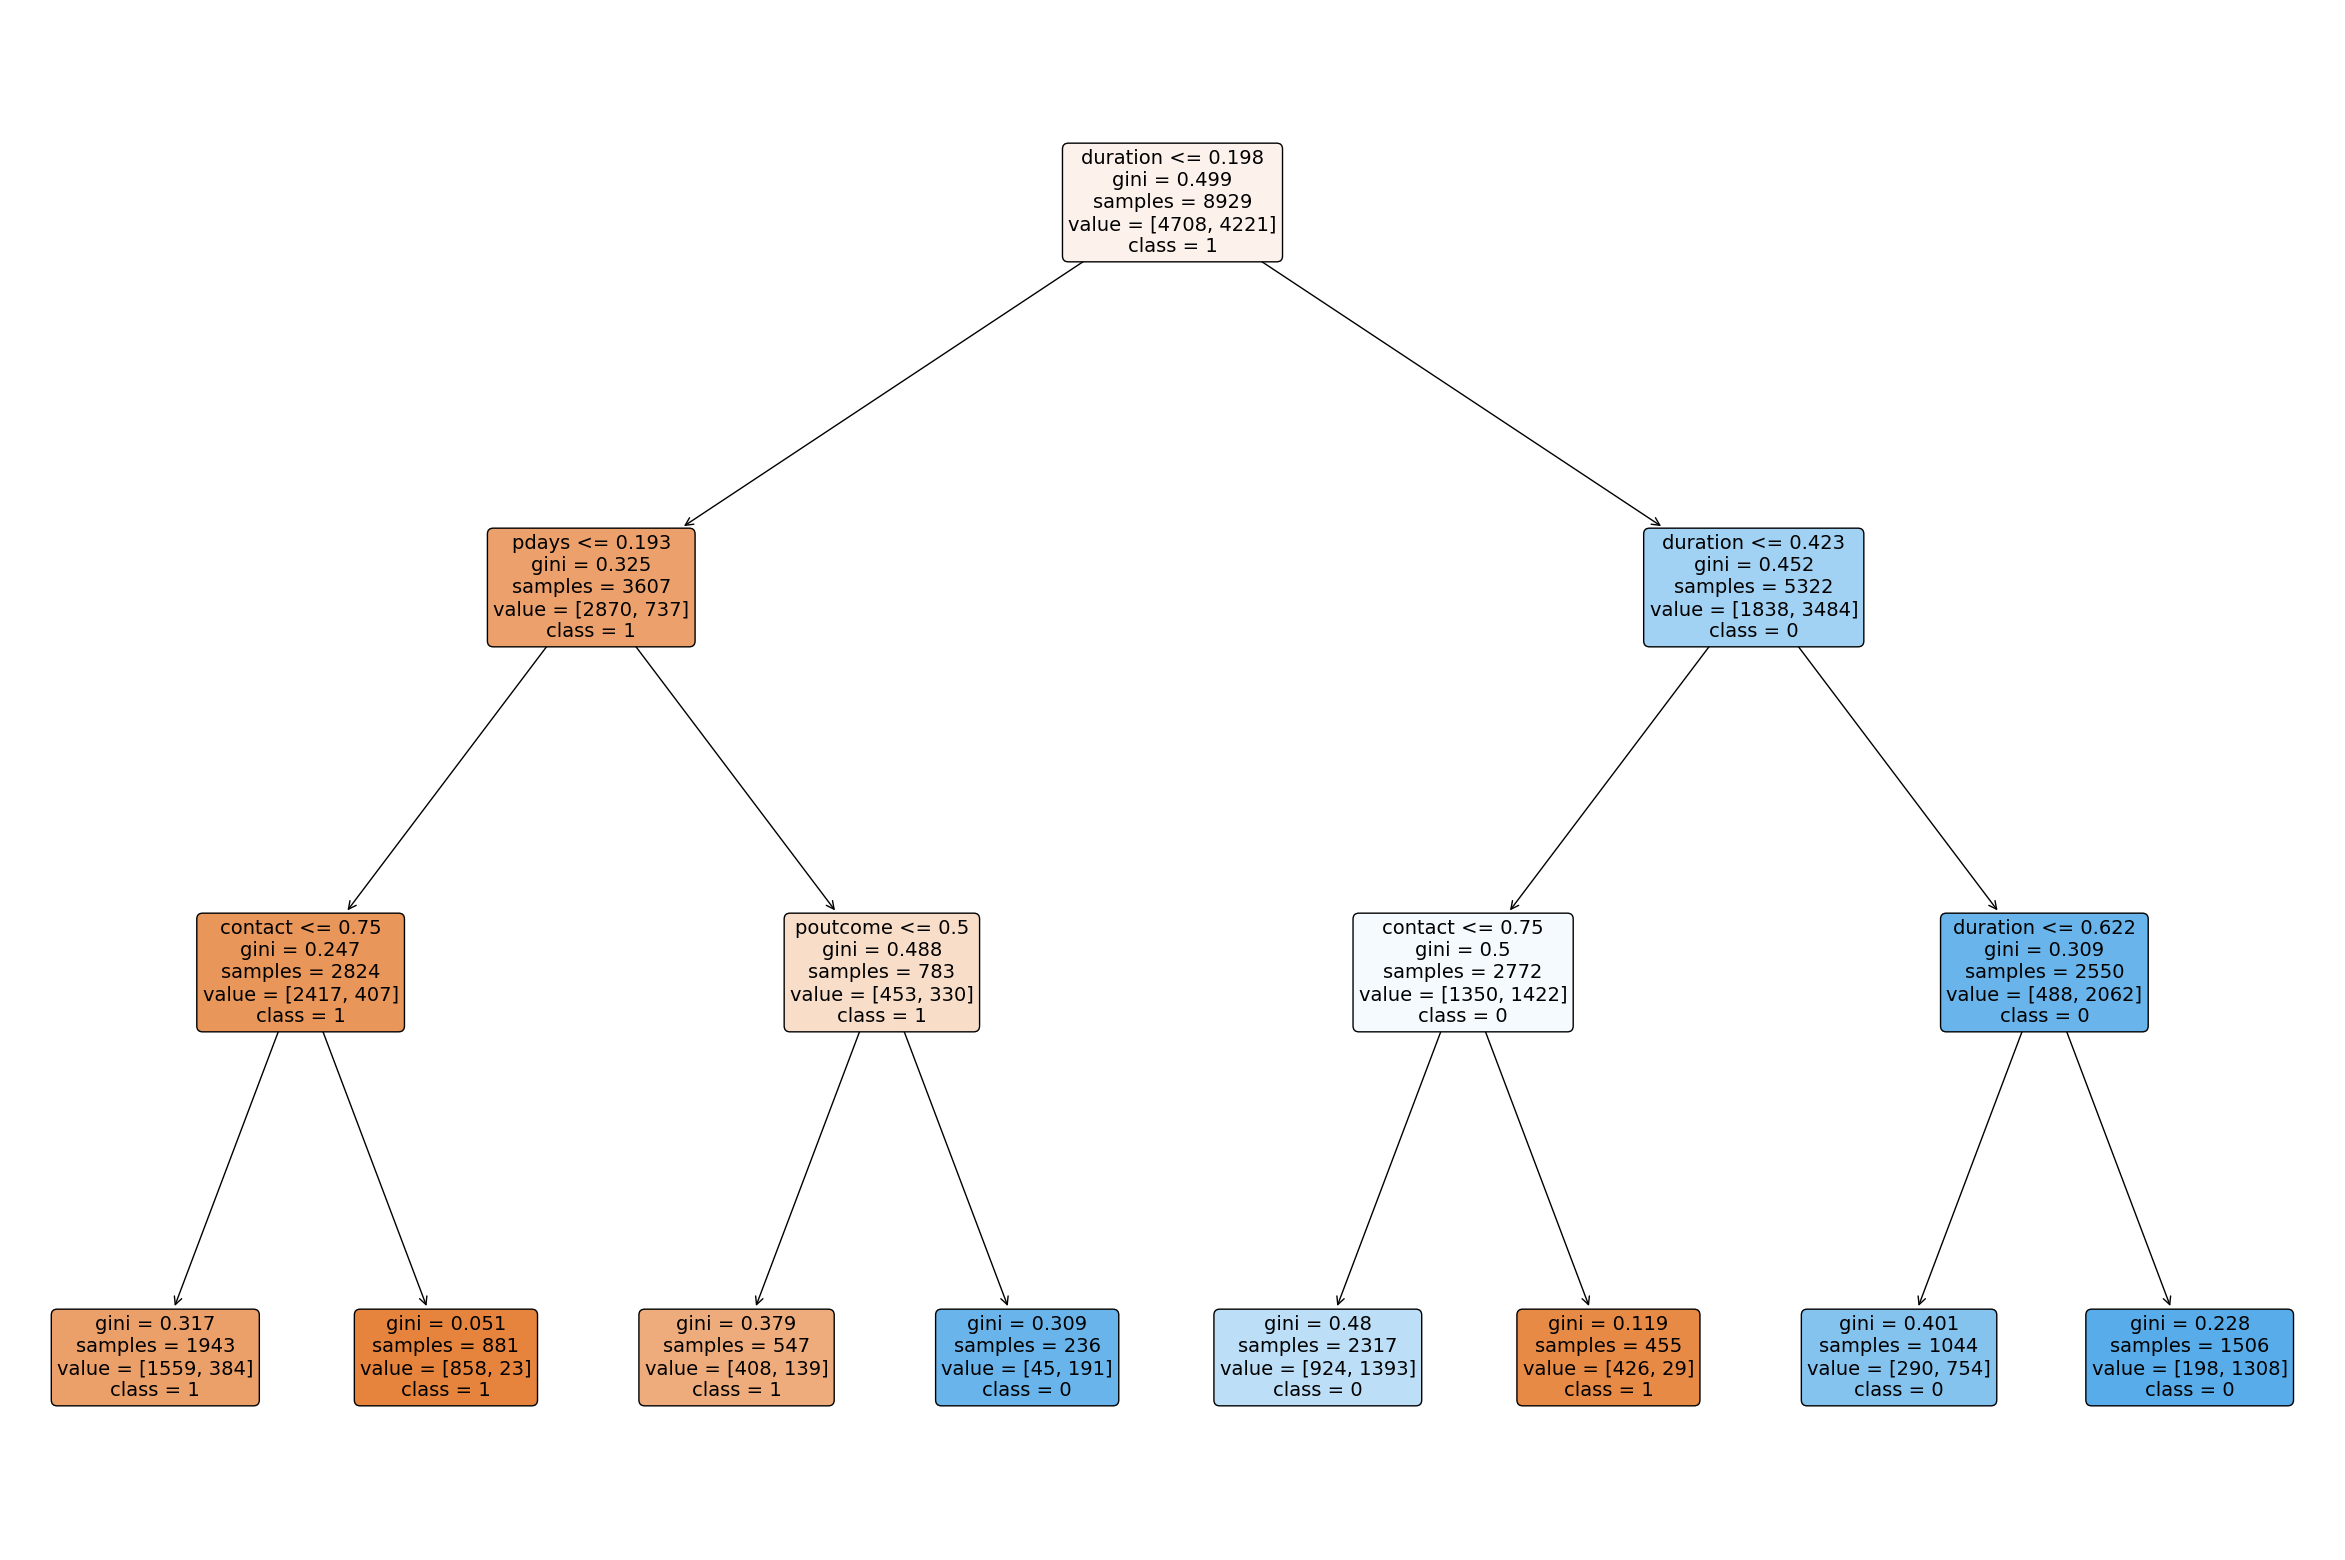

In [ ]:
plt.figure(figsize=(30,20))
tree.plot_tree(clf, feature_names=feature_names,class_names=labels ,rounded = True, filled=True, fontsize=14)
plt.show()